In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import random
import math
from scipy.optimize import minimize as mini
from scipy.optimize import least_squares as ls
from scipy.optimize import leastsq
import pyOpt
from pyOpt import CONMIN
from pyOpt import Optimization

In [2]:
MAG_VEGA_B = 0.03
MAG_VEGA_V = 0.03
MAG_VEGA_G = 0.03
MAG_VEGA_J = -0.18
MAG_VEGA_H = -0.03
MAG_VEGA_K = 0.13

MAG_VEGA_g = -0.08
MAG_VEGA_r = 0.16
MAG_VEGA_i = 0.37
MAG_VEGA_z = 0.54

FLUX_LAMBDA_VEGA_B = 632*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_V = 363.1*10**(-11)
FLUX_LAMBDA_VEGA_G = float('nan')
FLUX_LAMBDA_VEGA_J = 31.47*10**(-11)
FLUX_LAMBDA_VEGA_H = 11.38*10**(-11)
FLUX_LAMBDA_VEGA_K = 3.961*10**(-11)

FLUX_LAMBDA_VEGA_g = 466.9*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_r = 278.0*10**(-11)
FLUX_LAMBDA_VEGA_i = 185.2*10**(-11)
FLUX_LAMBDA_VEGA_z = 131.5*10**(-11)

data = np.loadtxt('/home/lynge/MasterP/NOVEMBER/NOV-NGC3783-K')
error = np.loadtxt('/home/lynge/MasterP/NOVEMBER/NGC3783_NOISE_K.txt')

time1 = [1,2,3,4,5,6,7,8,9,10]
flux1 = [1,2,5,7,3,1,4,6,7,3]
sigma1 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]


time1 = np.array(time1)
flux1 = np.array(flux1)
sigma1 = np.array(sigma1)

time = np.insert(time1,0,0)
sigma = np.insert(sigma1,0,np.mean(sigma1))
flux = np.insert(flux1,0,np.mean(flux1))

print time1
print sigma1
print flux1



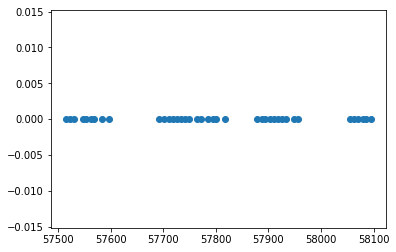

yes
yes
yes
yes 2
yes
yes 2
yes 2
yes 2
yes 2
yes
[6.53724662e-15 6.71527344e-15 6.60099894e-15 6.37713900e-15
 6.66855803e-15 6.67181077e-15 6.40972481e-15 6.56864377e-15
 6.57594350e-15 6.74248785e-15 7.06941435e-15 7.16508274e-15
 7.60092634e-15 7.60039417e-15 8.05099584e-15 8.21301406e-15
 8.22193811e-15 8.25153761e-15 8.38115563e-15 9.19988661e-15
 9.20615762e-15 9.29548448e-15 9.44518380e-15 9.50857590e-15
 9.73722913e-15 9.80940383e-15 9.78447827e-15 9.85013975e-15
 9.76320384e-15 9.45886211e-15 9.26290708e-15 9.16831540e-15
 9.11523113e-15 9.00052668e-15]
[    0. 57516. 57530. 57547. 57554. 57562. 57569. 57583. 57598. 57693.
 57701. 57719. 57726. 57741. 57749. 57764. 57786. 57794. 57801. 57817.
 57878. 57887. 57894. 57903. 57910. 57918. 57925. 57933. 57949. 57956.
 58055. 58062. 58070. 58079. 58086.]
[1.58020423e-16 1.59502546e-16 1.76239282e-16 1.89703949e-16
 1.90167133e-16 1.89057045e-16 1.84334581e-16 1.83187539e-16
 1.80173025e-16 1.80247249e-16 1.78328491e-16 1.62820662e-

In [3]:
data = np.loadtxt('NOVEMBER/NOV-NGC3783-K')
error = np.loadtxt('NOVEMBER/NGC3783_NOISE_K.txt')

plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.show()

#print data[:,0]
#print data[:,1]
#print error[:,0]
#print error[:,4]


time2 = data[:,0]
flux2 = data[:,1]
sigma2 = error[:,1]

time1 = []
flux1 = []
sigma1 = []
 

for i in range(len(time2)):
    if np.isnan(sigma2[i]):
        print 'yes'
    elif np.isnan(flux2[i]):
        print 'yes 2'
    else:
        time1.append(time2[i])
        flux1.append(flux2[i])
        sigma1.append(sigma2[i])

time1 = np.array(time1)
flux1 = np.array(flux1)
sigma1 = np.array(sigma1)

time = np.insert(time1,0,0)
sigma = np.insert(sigma1,0,np.mean(sigma1))
flux = np.insert(flux1,0,np.mean(flux1))

#sigma1 = -2.5*np.log10((flux1 + sigma1)/FLUX_LAMBDA_VEGA_K)
#sigma = -2.5*np.log10((flux + sigma)/FLUX_LAMBDA_VEGA_K)
#flux1 = -2.5*np.log10(flux1/FLUX_LAMBDA_VEGA_K)
#flux = -2.5*np.log10(flux/FLUX_LAMBDA_VEGA_K)

#sigma1 = abs(sigma1 - flux1)
#sigma = abs(sigma - flux)

print flux1

print time
print sigma
print flux

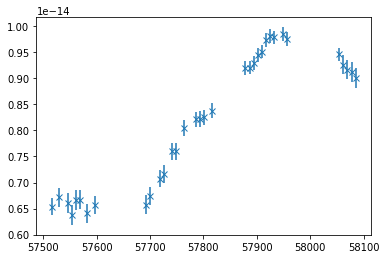

In [4]:
plt.figure()
plt.errorbar(time1,flux1,yerr=sigma1,fmt='x')
plt.show()

In [5]:
b = 8.*10**(-2)
tau = 800.
sigma_tot = 1*10**(-16)

param = [b,tau,sigma_tot]

In [6]:
'''x denotes the observed fluxes, and t the observation times, 
sigma is the error variances and p is the probability function'''

def a_i(t2,t1,tau):
    tau = float(tau)
    return np.exp(-(t2-t1)/tau)

def omega_0(tau,sigma_tot):
    return 0.5*tau*sigma_tot**2

def omega_i(omega_0,a_i,omega_before,sigma_before):
    return omega_0*(1-a_i**2) + a_i**2*omega_before*(1 - omega_before/(omega_before + sigma_before**2))

def x_hat_i(a_i,x_hat_before,omega_before,sigma_before,x_star_before):
    return a_i*x_hat_before + ((a_i*omega_before)/((omega_before + sigma_before**2)))*(x_star_before - x_hat_before)

def x_star_i(x_i,b,tau):
    return x_i - b*tau


In [7]:
def parameters(param):
    x_hat = [0]
    omega = [0.5*param[1]*param[2]**2]
    x_star = [-param[0]*param[1]]
    a = []
    for i in range(len(flux1)):
        a.append(a_i(time[i+1],time[i],param[1]))
        x_hat.append(x_hat_i(a[i],x_hat[i],omega[i],sigma[i],x_star[i]))
        omega.append(omega_i(omega_0(param[1],param[2]),a[i],omega[i],sigma[i]))
        x_star.append(x_star_i(flux[i+1],param[0],param[1]))
    x_hat[0] = np.mean(x_hat)
    x_hat[1] = np.mean(x_hat)
    return x_hat,omega,x_star,a


In [8]:
def prob(param):
    x_hat,omega,x_star,a = parameters(param)
    #print x_hat
    #print x_star
    #print omega
    
    probability = 1
    for i in range(len(a)):
        #print omega[i+1],sigma[i+1]**2 #,x_hat[i+1],x_star[i+1],a[i]
        #print (x_hat[i+1] - x_star[i+1])
        part = np.log(1/np.sqrt(2*np.pi*(omega[i+1] + sigma[i+1]**2)))\
        -(1/2.)*(((x_hat[i+1] - x_star[i+1])**2.)/(omega[i+1] + sigma[i+1]**2.))
        #print part,sigma1[i]
        #print ((x_hat[i+1] - x_star[i+1])**2.)/(omega[i+1] + sigma[i+1]**2.)
        #print 1/np.sqrt(2*np.pi*(omega[i+1] + sigma[i+1]**2))
        probability += part
        #print part, probability
    return -probability

In [9]:
def dX(tau,sigma,dt,b,epsilon,X):
    dt = dt
    sigma = sigma
    return (-(1/tau)*X*dt + sigma*np.sqrt(dt)*epsilon + b*dt)

def dX(tau,sigma,dt,b,epsilon,X):
    res = 0
    if X < b*tau:
        res = -(1/tau)*X*dt + sigma*np.sqrt(dt)*epsilon + b
    if X > b*tau:
        res = (1/tau)*X*dt + sigma*np.sqrt(dt)*epsilon - b
    return res

In [28]:
kelly_repeat = 2000

def flux_model(param):
    '''Creating the kelly function'''
    res = mini(prob,param,method='Nelder-Mead',tol=1e-18)
    
    tau = res.x[1]
    b = res.x[0]
    sigma_tot = res.x[2]
    
    model = np.zeros((kelly_repeat,len(flux1)))
    dx_day = np.zeros((kelly_repeat,len(flux1)))
    flux_array = np.array([flux,]*(kelly_repeat))
    dt = np.array([abs(np.diff(time)),]*kelly_repeat)
    
    epsilon = np.random.normal(0,1,size=np.shape(dt))
    
    X1 = np.array([flux1[:],]*kelly_repeat) #flux1[1:]
    
    change = dX(tau,sigma_tot,dt,b,epsilon,X1)
    
    model = flux_array[:,:-1] + change
    
    model2 = np.mean(model,axis=0)
    
    std = np.std(model,axis=0)
    
    time_model = time1
    
    dx_days = np.mean(dx_day,axis=0)
    
    flux_model = np.array((time_model,model2,std,res.x))
    
    return flux_model,time_model, model2, dx_days

def flux_model1(param):
    '''Forming the Kelly function from in reverse'''
    res = mini(prob,param,method='Nelder-Mead',tol=1e-18)
    tau = res.x[1]
    b = res.x[0]
    timef = time[::-1]
    fluxf = flux[::-1]
    time1f = time1[::-1]
    flux1f = flux1[::-1]
    sigma_tot = res.x[2]
    model = np.zeros((kelly_repeat,len(flux1f)))
    flux_test = flux1f[0]
    dx_day = np.zeros((kelly_repeat,len(flux1f)))
    flux_array = np.array([fluxf,]*(kelly_repeat))
    dt = np.array([abs(np.diff(timef)),]*kelly_repeat)
    epsilon = np.random.normal(0,1,size=np.shape(dt))
    X1 = np.array([flux1f[:],]*kelly_repeat) #flux1[1:]
    change = dX(tau,sigma_tot,dt,b,epsilon,X1)
    model = flux_array[:,:-1] + change
    model2 = np.mean(model,axis=0)
    std = np.std(model,axis=0)
    time_model = time1f
    dx_days = np.mean(dx_day,axis=0)
    flux_model = np.array((time_model,model2,std,res.x))
    return flux_model[::-1],time_model[::-1], model2[::-1], dx_days[::-1]

In [29]:
flux_model, time_model, model2, dx_days = flux_model(param) #p1.join()
#model1, time_model1, model12, dx_days1 = flux_model1(param) #p2.join()
#model = np.add(model,model1)/2.
#time_model = np.add(time_model,time_model1)/2.
#model2 = np.add(model2,model12)/2.

ValueError: operands could not be broadcast together with shapes (35,2000) (2000,34) 

In [ ]:
plt.figure(figsize=(15,10))
plt.errorbar(time1,flux1,yerr=sigma1,fmt='o',label='Observed K-band LC')
plt.plot(time_model,model2,linestyle='-',color='r',label='Kelly LC')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.legend()
#plt.errorbar(time_model,model2,yerr=std,fmt='.',color='r')
#plt.ylim([4e-15,1.2e-14])
plt.show()
'''
plt.figure(figsize=(15,10))
plt.errorbar(time1,flux1,yerr=sigma1,fmt='x')
for i in range(len(model[:,0])):
    plt.plot(time1,model[i,:],linestyle='-')
#plt.ylim([4e-15,1.2e-14])
plt.show()

plt.figure(figsize=(15,10))
plt.errorbar(time1,flux1,yerr=sigma1,fmt='x')
#plt.ylim([4e-15,1.2e-14])
plt.show()
'''

In [ ]:
print np.random.normal(0,1,1)